<a href="https://colab.research.google.com/github/ChoYeongjo/book-pytorch-ai-app-practice/blob/main/250908_book_AI_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

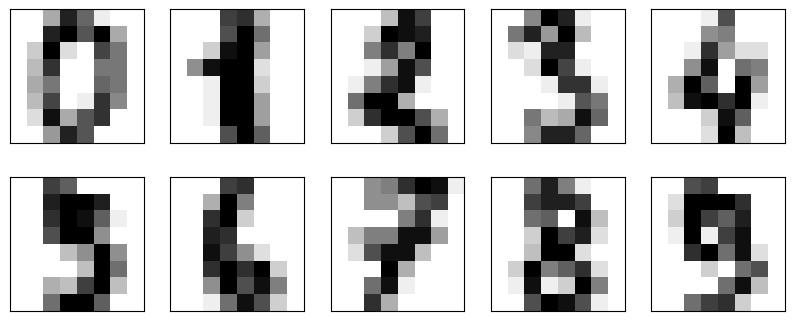

데이터의 형태:  (1797, 64)
레이블의 형태:  [0 1 2 3 4 5 6 7 8 9]


In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data=datasets.load_digits()

n_img=10
plt.figure(figsize=(10,4))
for i in range(n_img):
  ax=plt.subplot(2,5,i+1)
  ax.imshow(digits_data.data[i].reshape(8,8), cmap='gray_r')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print("데이터의 형태: ",digits_data.data.shape)
print("레이블의 형태: ",digits_data.target[:n_img])

In [10]:
import torch
from sklearn.model_selection import train_test_split

digit_images=digits_data.data
lables=digits_data.target

# X_train, X_test, y_train, y_test=train_test_split(digit_images, lables)
x_train, x_test, t_train, t_test=train_test_split(digit_images, lables)

In [ ]:
# X_train.shape, X_train.dtype, type(X_train)

((1347, 64), dtype('float64'), numpy.ndarray)

In [11]:
x_train=torch.tensor(x_train, dtype=torch.float32)
x_test=torch.tensor(x_test, dtype=torch.float32)
t_train=torch.tensor(t_train, dtype=torch.int64)
t_test=torch.tensor(t_test, dtype=torch.int64)

In [12]:
from torch import nn
net=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [13]:
from torch import optim
loss=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.01)

record_loss_train=[]
record_loss_test=[]

for i in range(1000):
  optimizer.zero_grad()

  #순전파
  y_pred_train=net(x_train)
  y_pred_test=net(x_test)

  # 오차 기록 및 계산
  loss_train=loss(y_pred_train, t_train)
  loss_test=loss(y_pred_test, t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  #역전파
  loss_train.backward()
  #파라미터 갱신
  optimizer.step()

  if i%200==0:
    print(f"Epoch: {i}, Loss_Train: {loss_train.item():.3f}, Loss_Test:{loss_test.item():.3f}")

Epoch: 0, Loss_Train: 2.778, Loss_Test:2.826
Epoch: 200, Loss_Train: 0.306, Loss_Test:0.338
Epoch: 400, Loss_Train: 0.152, Loss_Test:0.191
Epoch: 600, Loss_Train: 0.105, Loss_Test:0.147
Epoch: 800, Loss_Train: 0.081, Loss_Test:0.127


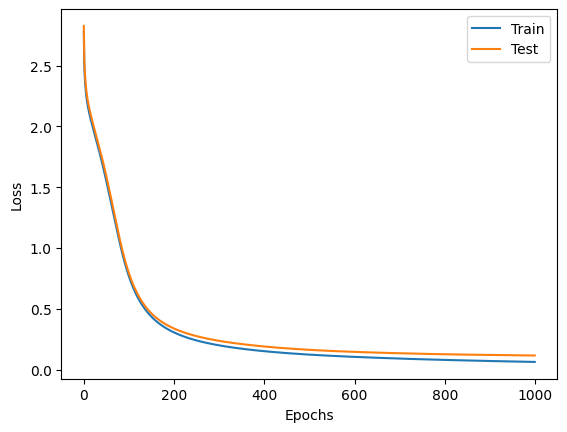

In [14]:
plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
y_pred_test=net(x_test)
count=(y_pred_test.argmax(1)==t_test).sum().item()
print(f"Accuracy: {count/len(t_test):.5f}")

Accuracy: 0.96222


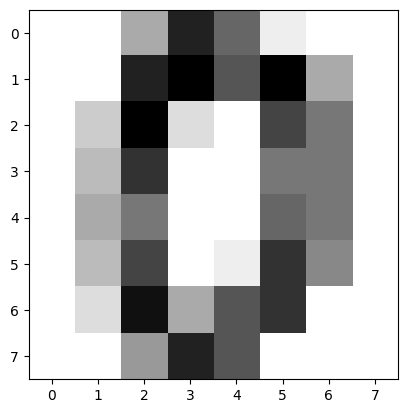

정답: 0  예측결과:  0


In [17]:
#p.108
img_id=0
x_pred=digit_images[img_id]
image=x_pred.reshape(8,8)
plt.imshow(image, cmap='gray_r')
plt.show()

x_pred=torch.tensor(x_pred, dtype=torch.float32)
y_pred=net(x_pred)
print("정답:", lables[img_id]," 예측결과: ", y_pred.argmax().item())

In [18]:
#4.1 자동미분 p.120
import torch
x=torch.ones(2,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [19]:
y=x+2
print(y)
print(y.grad_fn)

tensor([[3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward0>)


In [22]:
z=y*3
print(z)
out=z.mean()
print(out)

tensor([[9., 9., 9.],
        [9., 9., 9.]], grad_fn=<MulBackward0>)
tensor(9., grad_fn=<MeanBackward0>)


In [23]:
#4.1.3 경사계산
a=torch.tensor([1.0], requires_grad=True)
b=a*2
b.backward()
print(a.grad)

tensor([2.])


In [24]:
def calc(a):
  b=a*2+1
  c=b*b
  d=c/(c+2)
  e=d.mean()
  return e

x=[1.0,2.0,3.0]
x=torch.tensor(x,requires_grad=True)
y=calc(x)
y.backward()
print(x.grad)

tensor([0.0661, 0.0183, 0.0072])


In [26]:
#p.127 미세한 변화로 backward()로 나온값 검증
delta=0.001
x=[1.0, 2.0, 3.0]
x=torch.tensor(x)
y=calc(x)

x_1=[1.0+delta, 2.0, 3.0]
x_1=torch.tensor(x_1)
y_1=calc(x_1)

x_2=[1.0, 2.0+delta, 3.0]
x_2=torch.tensor(x_2)
y_2=calc(x_2)

x_3=[1.0, 2.0, 3.0+delta]
x_3=torch.tensor(x_3)
y_3=calc(x_3)

grad_1=(y_1-y)/delta
grad_2=(y_2-y)/delta
grad_3=(y_3-y)/delta

print(grad_1, grad_2, grad_3)
grads=torch.stack([grad_1, grad_2, grad_3])
print(grads)

tensor(0.0660) tensor(0.0183) tensor(0.0072)
tensor([0.0660, 0.0183, 0.0072])


In [ ]:
#p.129 4.2 에포크와 배치